<a href="https://colab.research.google.com/github/havaledar/test/blob/main/ECON3740_F24_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logical operations

1. & (AND): Logical AND. Returns True when both conditions are True.
2. | (OR): Logical OR. Returns True when at least one of the conditions is True.
3. ~ (NOT): Logical NOT. Inverts the boolean values (True becomes False and vice versa).

In [1]:
%%capture

!pip install wooldridge

import wooldridge as woo

data = woo.data('401k')

ModuleNotFoundError: No module named 'wooldridge'

In [2]:
sorted(data['age'].unique())

NameError: name 'data' is not defined

In [ ]:
data[data['age'] >= 20]

In [ ]:
data[(data['age'] >= 20) & (data['age'] <= 30)]

In [ ]:
data[(data['age'] >= 20) | (data['age'] <= 30)]

# Selecting rows and Columns

In [ ]:
data[['mrate', 'prate']]

In [ ]:
data[:5]

# Concating dataframes

In [ ]:
df20 = data[(data['age'] == 20)]

In [ ]:
df30 = data[(data['age'] == 30)]

In [ ]:
import pandas as pd
pd.concat([df20, df30])

# if

In [ ]:
num = -10

if num > 0:
    print("The number is positive.")

In [ ]:
num = -10

if num > 0:
    print("The number is positive.")
else:
    print("The number is not positive.")

In [ ]:
num = 10

if num > 0:
    print("The number is positive.")
elif num == 0:
    print("The number is zero.")
else:
    print("The number is negative.")

# for

In [ ]:
fruits = ['apple', 'banana', 'cherry']

In [ ]:
fruits[2]

In [ ]:
fruits = ['apple', 'banana', 'cherry']

for f in fruits:
    print(f)

In [ ]:
numbers = [1, 2, 3, 4, 5]
total = 0

for num in numbers:
    total += num
    print(total)

# print(total)

## range

In [ ]:
list(range(1, 6))

In [ ]:
total = 0

for i in range(1,6):
    total += i

print(f"The total sum is {total}")

#Google Drive

In [ ]:
# !pip install gdown==v4.6.3
import gdown
import pandas as pd



1.   Upload your file to the Google Drive.
2.   Click **Share** and change the access to **Anyone with the link**.
3. Copy the URL to the file.



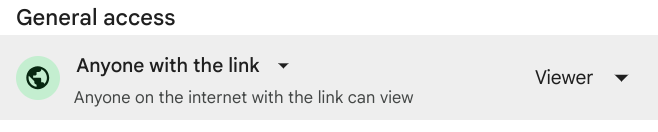

In [ ]:
url = 'https://drive.google.com/file/d/1eq0As_rQFayM4d6QR43owoW4huD3urhE/view?usp=sharing'
output_filename = 'file.dta'
gdown.download(url, output_filename, fuzzy=True ,quiet=False)

In [ ]:
pd.read_stata("file.dta")

#URL

In [ ]:
data = pd.read_excel("https://cengage-dps.s3.amazonaws.com/economics/690273_wooldridge_8e/meap01_v4.xlsx")

# Stats Canada

In [ ]:
%%capture
!pip install stats-can

In [ ]:
import stats_can

Total employed, all classes of workers

https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1410028801

In [ ]:
df = stats_can.sc.vectors_to_df('v2066967', periods = 20)

In [ ]:
df.columns = ['Total employed']

df

# Scraping

In [ ]:
url = "https://en.wikipedia.org/wiki/Economy_of_Canada"

## Pandas

In [ ]:
tables = pd.read_html(url)

tables[5]

## BeautifulSoup

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# Downloading contents of the web page
data = requests.get(url).text

In [ ]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [ ]:
# Verifying tables and their classes
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

In [ ]:
# Creating list with all tables
tables = soup.find_all('table')

In [ ]:
tables[5]

In [ ]:
columns = [
    'Year',
    'GDP_PPP_Bil_USD',
    'GDP_per_capita_PPP_USD',
    'GDP_nominal_Bil_USD',
    'GDP_per_capita_nominal_USD',
    'GDP_growth_real',
    'Inflation_rate_percent',
    'Unemployment_percent',
    'Government_debt_percent_of_GDP'
]

df = pd.DataFrame(columns=columns)

In [ ]:
for row in tables[5].tbody.find_all('tr'):
    # Find all data for each column
    columns = row.find_all('td')

    if columns != []:
        year = columns[0].text.strip()
        gdp_ppp_bil_usd = columns[1].text.strip()
        gdp_per_capita_ppp_usd = columns[2].text.strip()
        gdp_nominal_bil_usd = columns[3].text.strip()
        gdp_per_capita_nominal_usd = columns[4].text.strip()
        gdp_growth_real = columns[5].text.strip()
        inflation_rate_percent = columns[6].text.strip()
        unemployment_percent = columns[7].text.strip()
        government_debt_percent_of_gdp = columns[8].text.strip()

        row_data = {
            'Year': year,
            'GDP_PPP_Bil_USD': gdp_ppp_bil_usd,
            'GDP_per_capita_PPP_USD': gdp_per_capita_ppp_usd,
            'GDP_nominal_Bil_USD': gdp_nominal_bil_usd,
            'GDP_per_capita_nominal_USD': gdp_per_capita_nominal_usd,
            'GDP_growth_real': gdp_growth_real,
            'Inflation_rate_percent': inflation_rate_percent,
            'Unemployment_percent': unemployment_percent,
            'Government_debt_percent_of_GDP': government_debt_percent_of_gdp
        }

        # Convert row_data to a DataFrame
        row_df = pd.DataFrame([row_data])

        # Use pandas.concat to add the row to the df_short DataFrame
        df = pd.concat([df, row_df], ignore_index=True)

In [ ]:
df.head()